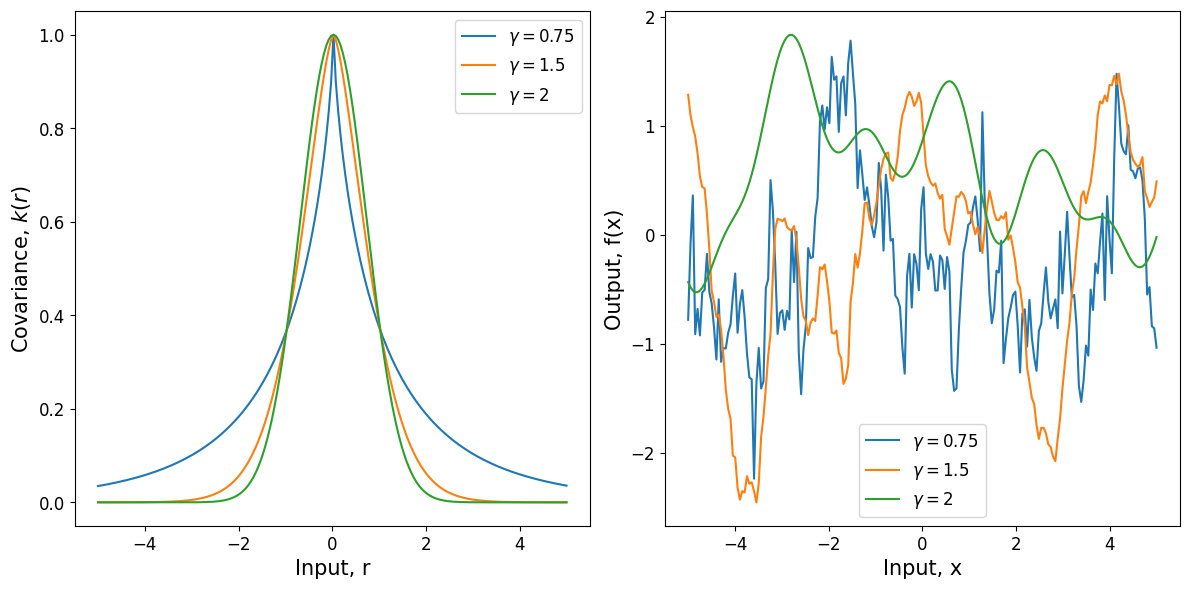

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def gamma_exponential_kernel(X, Y, length_scale=1.0, gamma=1.0):
    # Compute the distance matrix
    dists = np.abs(X - Y.T)
    # Compute the covariance matrix
    K = np.exp(-(dists / length_scale) ** gamma)
    return K

# Input range
x = np.linspace(-5, 5, 200)

# Compute the covariance matrices for different gamma values
gamma_1 = 0.75
gamma_1_5 = 1.5
gamma_2 = 2.0

X = x[:, np.newaxis]
K_1 = gamma_exponential_kernel(X, X, length_scale=1.0, gamma=gamma_1)
K_1_5 = gamma_exponential_kernel(X, X, length_scale=1.0, gamma=gamma_1_5)
K_2 = gamma_exponential_kernel(X, X, length_scale=1.0, gamma=gamma_2)

# Tomar una f por kernel
np.random.seed(42)
f_1 = multivariate_normal.rvs(mean=np.zeros(len(x)), cov=K_1)
f_1_5 = multivariate_normal.rvs(mean=np.zeros(len(x)), cov=K_1_5)
f_2 = multivariate_normal.rvs(mean=np.zeros(len(x)), cov=K_2)

# Plot funciones de covarianza
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, K_1[len(x)//2], label=r'$\gamma=0.75$')
plt.plot(x, K_1_5[len(x)//2], label=r'$\gamma=1.5$')
plt.plot(x, K_2[len(x)//2], label=r'$\gamma=2$')
plt.xlabel('Input, r', fontsize=15)
plt.ylabel('Covariance, $k(r)$', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Se muestra un ejemplo por valor de gamma
plt.subplot(1, 2, 2)
plt.plot(x, f_1, label=r'$\gamma=0.75$')
plt.plot(x, f_1_5, label=r'$\gamma=1.5$')
plt.plot(x, f_2, label=r'$\gamma=2$')
plt.xlabel('Input, x', fontsize=15)
plt.ylabel('Output, f(x)', fontsize=15)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
